In [2]:
!pip install h5py # h5py vous permet d'ouvrir les fichiers au format hdf5. N'oubliez pas de l'installer !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
# from sklearn.metrics import log_loss

In [2]:
with h5py.File("datasets/trainset.hdf5", "r") as file:
    print(list(file.keys()))

['X_train', 'Y_train']


In [3]:
with h5py.File("datasets/trainset.hdf5", "r") as file:
    X_train = file['X_train'][:]
    y_train = file['Y_train'][:]

print(f"X_train:{X_train.shape}")
print(f"y_train:{y_train.shape}")

X_train:(1000, 64, 64)
y_train:(1000, 1)


In [4]:
with h5py.File("datasets/testset.hdf5", "r") as file:
    X_test = file['X_test'][:]
    y_test = file['Y_test'][:]

print(f"X_test:{X_test.shape}")
print(f"y_test:{y_test.shape}")

X_test:(200, 64, 64)
y_test:(200, 1)


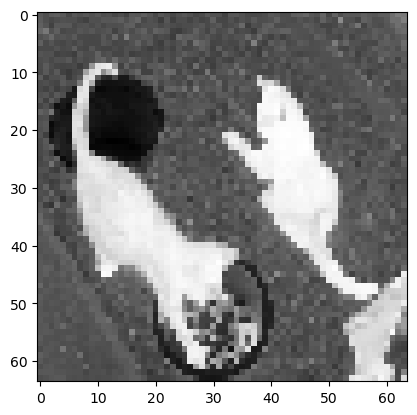

In [5]:
plt.imshow(X_train[0], cmap='gray_r')

In [6]:
X_train[0].flatten()

array([164, 174, 163, ...,  87, 180,  39], dtype=uint8)

In [9]:
def img_to_1d(X):
    row = X.shape[0]
    col = X.shape[1]*X.shape[2]
    X_1d = np.zeros((row, col))
    for i, x in enumerate(X):
        X_1d[i, :] = x.flatten()

    return X_1d

In [10]:
X_train_1d = img_to_1d(X_train)
X_test_1d = img_to_1d(X_test)

print(f"X_train_1d:{X_train_1d.shape}")
print(f"X_test_1d:{X_test_1d.shape}")

X_train_1d:(1000, 4096)
X_test_1d:(200, 4096)


In [11]:
from neuron import *

  0%|          | 0/1000 [00:00<?, ?it/s]/home/morel/Documents/ml_stuff/uvs/DeepLearning/neuron.py:14: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
/home/morel/Documents/ml_stuff/uvs/DeepLearning/neuron.py:14: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
/home/morel/Documents/ml_stuff/uvs/DeepLearning/neuron.py:14: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  1%|▏         | 13/1000 [00:00<00:08, 120.82it/s]/home/morel/Documents/ml_stuff/uvs/DeepLearning/neuron.py:14: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  3%|▎         | 28/1000 [00:00<00:07, 132.84it/s]/home/morel/Documents/ml_stuff/uvs/DeepLearning/neuron.py:14: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
/home/morel/Documents/ml_stuff/uvs/DeepLearning/neuron.py:14: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  4%|▍         | 42/1000 [00:00<00:07, 134.75it/s]/home/morel/

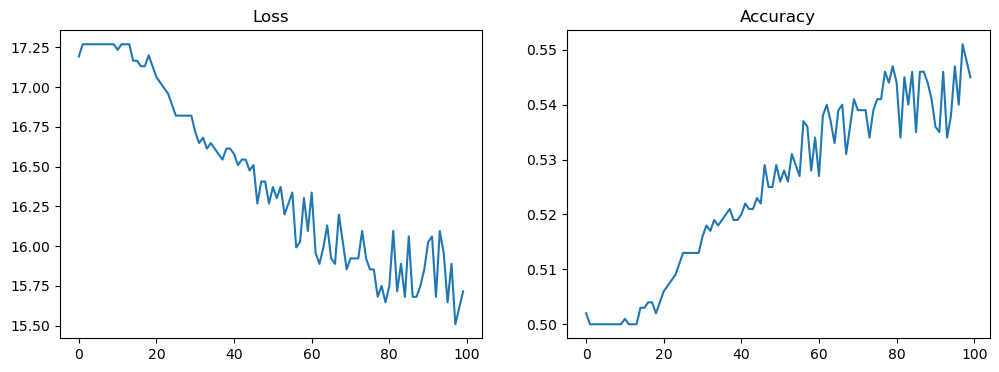

In [12]:
W, b = artificial_neuron(X_train_1d, y_train, learning_rate=1000)

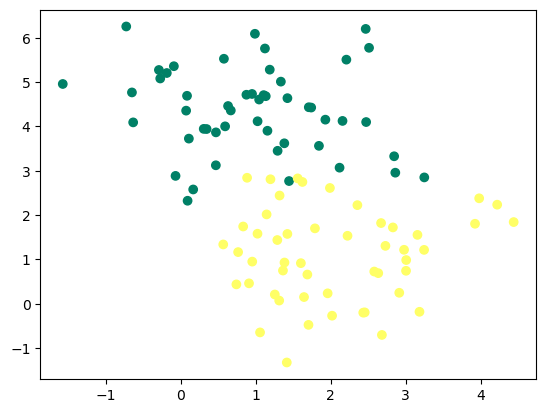

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

#X[:, 1] = X[:, 1]*10
y = y.reshape(-1, 1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')

In [46]:
lim = 10
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)
W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape

(2, 10000)

In [47]:
b = 0
Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z))

A.shape

epsilon = 1e-15
L = 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(100, 100)
L.shape

(100, 100)

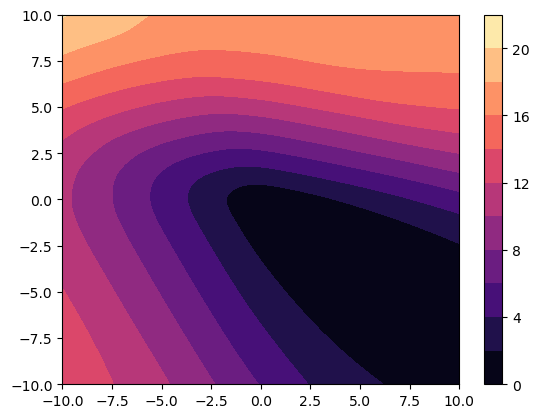

In [48]:
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()

In [52]:
def artificial_neuron2(X, y, learning_rate=0.1, n_iter=1000):
    
    W, b = initialisation(X)
    W[0], W[1] = -7.5, -7.5
    
    nb = 10
    j = 0
    history = np.zeros((n_iter // nb, 5))
    Loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(y, A))
        dw, db = gradients(A, X, y)
        W, b = update(dw, db, W, b, learning_rate)
        
        if (i % nb == 0):
            history[j, 0] = W[0]
            history[j, 1] = W[1]
            history[j, 2] = b
            history[j, 3] = i
            history[j, 4] = log_loss(y, A)
            j += 1
            
    plt.plot(Loss)
    plt.show()
    
    return history, b

/tmp/ipykernel_524283/3532790349.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  history[j, 0] = W[0]
/tmp/ipykernel_524283/3532790349.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  history[j, 1] = W[1]
/tmp/ipykernel_524283/3532790349.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  history[j, 2] = b


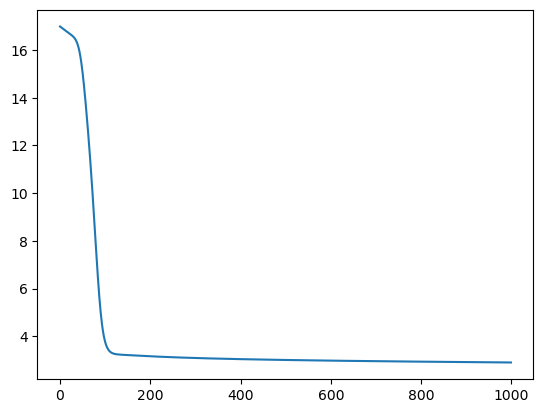

In [53]:
history, b = artificial_neuron2(X, y)

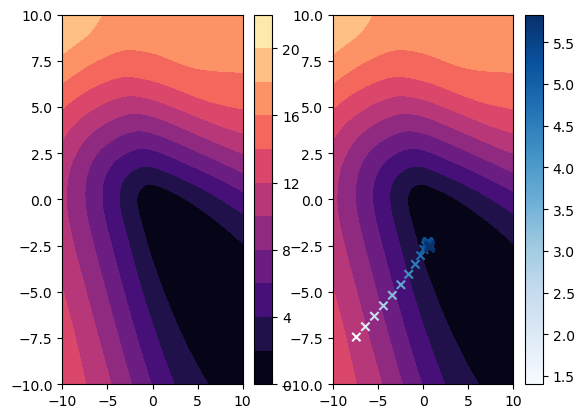

In [54]:
plt.subplot(1, 2, 1)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.scatter(history[:,0], history[:,1], c=history[:, 2], cmap='Blues', marker='x')
plt.colorbar()

In [55]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=L, x=W11, y=W22, opacity=1)])
fig.update_layout(template='plotly_dark', title='Loss function', margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = 'orthographic'
fig.show()

In [14]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_test.max()

100%|██████████| 10000/10000 [01:23<00:00, 119.28it/s]


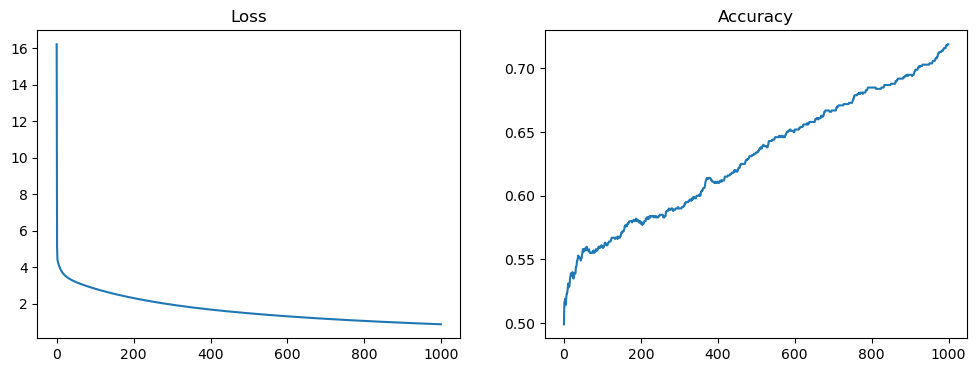

In [15]:
W, b = artificial_neuron(X_train_reshape, y_train, learning_rate=0.01, n_iterations=10000)